In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 남북한 발전전력량 데이터를 가지고 그래프를 생성 - twinx

df = pd.read_excel('../dataset/남북한발전전력량.xlsx')
df.head(10)                        # 총 9개의 row가 존재, 여기서 북한의 자료만 추출

df_north = df.loc[5 :].copy()
print(df_north)                    # 전력량(억kWh) 컬럼 제거

df_north.drop('전력량 (억㎾h)', axis = 1, inplace = True)
df_north

  전력량 (억㎾h) 발전 전력별 1990 1991 1992 1993 1994 1995 1996 1997  ... 2007 2008  \
5        북한     합계  277  263  247  221  231  230  213  193  ...  236  255   
6       NaN     수력  156  150  142  133  138  142  125  107  ...  133  141   
7       NaN     화력  121  113  105   88   93   88   88   86  ...  103  114   
8       NaN    원자력    -    -    -    -    -    -    -    -  ...    -    -   

  2009 2010 2011 2012 2013 2014 2015 2016  
5  235  237  211  215  221  216  190  239  
6  125  134  132  135  139  130  100  128  
7  110  103   79   80   82   86   90  111  
8    -    -    -    -    -    -    -    -  

[4 rows x 29 columns]


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
df_north.info                                    # 데이터 확인, '발전전력별' 컬럼을 인덱스로 설정
df_north.set_index('발전 전력별', inplace = True)
df_north

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [5]:
df_north = df_north.T

In [6]:
df_north

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


## 증감율 계산, 수력, 화력, 합계 -> 총발전량, 증감율 컬럼을 추가

In [7]:
df_north = df_north.rename(columns = {'합계' : '총발전량'})    
                               # rename(columns = {'바꾸려고 하는 이름' : '새로운 이름'})
    
df_north['총발전량 - 1년'] = df_north['총발전량'].shift(1)
                               # shift(1) : 현재의 자료에 이전(바로 위)의 자료를 빼는 것
df_north

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [8]:
# df_north['증감율'] = ((올해의 총발전량 / 이전년도의 총발전량) - 1) * 100

df_north['증감율'] = ((df_north['총발전량'] / df_north['총발전량 - 1년']) - 1) * 100
df_north

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


In [11]:
# %load 한글.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family = 'Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False



<AxesSubplot:>

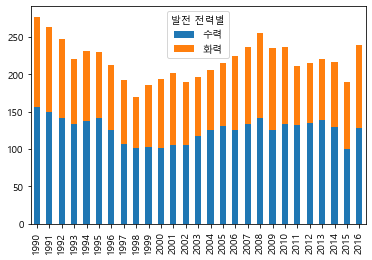

In [12]:
df_north[['수력', '화력']].plot(kind = 'bar', stacked = True)

## 2개의 축을 가진 그래프 그리기

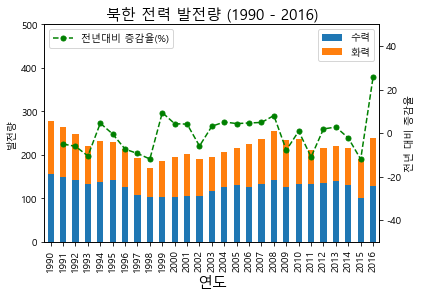

In [13]:
# 한 그래프에 두 개의 축을 그리는 것이기 때문에 굳이 fig를 저장하지 않아도 괜찮다.

ax1 = df_north[['수력', '화력']].plot(kind = 'bar', stacked =True)
ax2 = ax1.twinx()                    # 대신 한 그래프에 두 개의 정보가 있는 것이므로 ax1, ax2를 사용
                                         # 이 경우에는 twinx() 사용

ax2.plot(df_north.index, df_north['증감율'], linestyle = '--', marker = 'o',
        markersize = 5, color = 'green', label = '전년대비 증감율(%)')
                                                         # ax2의 배경이 만들어졌으니 내용을 추가
    
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 15)
ax1.set_ylabel('발전량')

ax2.set_ylabel('전년 대비 증감율')
plt.title('북한 전력 발전량 (1990 - 2016)', size = 15)

ax2.legend(loc = 'upper left')
ax1.legend(loc = 'best')

plt.show()

# seaborn 을 활용한 고급 그래프 작성하기

In [14]:
titanic = sns.load_dataset('titanic')

print(titanic.head()); print(0)

print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

# age, fare 컬럼간의 관계 -> 회귀선(fit_reg) : regplot

<AxesSubplot:xlabel='age', ylabel='fare'>

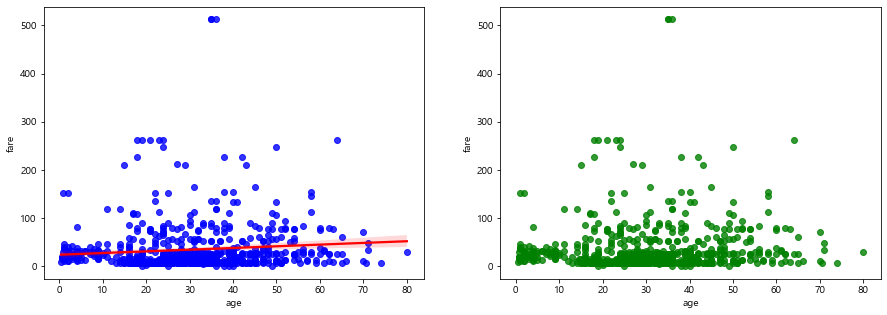

In [15]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)      # 회귀선을 그리기
ax2 = fig.add_subplot(1, 2, 2)      # 회귀선 보이지 않기

# 그래프 그리기 - 선형회귀선 표시 (fit_reg = True)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax1, color = 'blue', 
            line_kws = {'color' : 'red'})               
                                                  # seaborn 에서는 x, y를 직접적으로 작성
                                                  # line_kws 는 회귀선 색을 바꿔주는 옵션

# 그래프 그리기 - 선형회귀선 표시 (fit_reg = False)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax2, fit_reg = False, color = 'green')

## 커널 밀도 함수 : 데이터가 집중된 분포 - hist, kde (막대, 커널밀도)

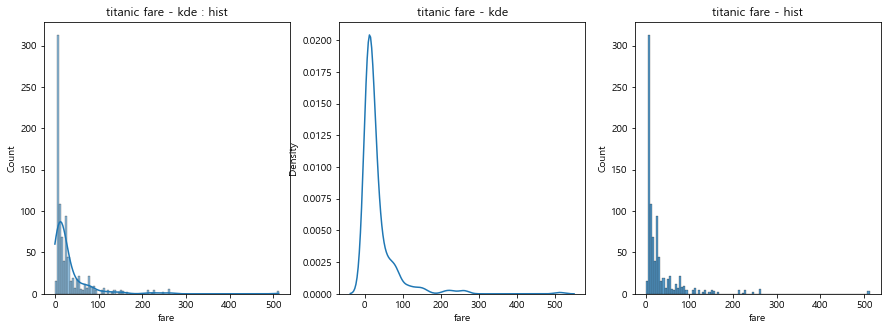

In [16]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값 : hist, kde
sns.histplot(titanic['fare'], ax =ax1, kde =True)
ax1.set_title('titanic fare - kde : hist')

# hist : False
# sns.distplot(titanic['fare'], ax =ax2, hist = False)
sns.kdeplot(titanic['fare'], ax =ax2)
ax2.set_title('titanic fare - kde')

# kde : False
# sns.distplot(titanic['fare'], ax =ax3, hist = False)
sns.histplot(titanic['fare'], ax =ax3)
ax3.set_title('titanic fare - hist')

plt.show()

# heatmap : 색갈로 다수의 변수에 관계성을 보여주는 그래프

<AxesSubplot:xlabel='class', ylabel='sex'>

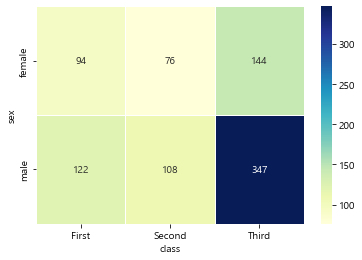

In [17]:
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'YlGnBu', linewidth = .5, cbar = True)
                                   # aggfunc 는 분포도 (여기서는 사이즈가 분포의 정도를 나타낸다?)

In [18]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

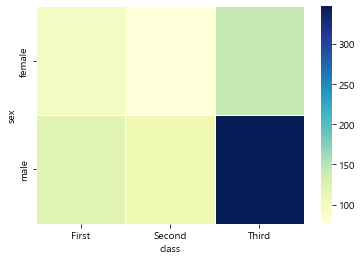

In [19]:
sns.heatmap(table, annot = False, fmt = 'd', cmap = 'YlGnBu', linewidth = .5, cbar = True)
         # annot 은 수치 표현    # fmt 는 주석을 추가할 때 문자열 형식코드

## 범주형 데이터의 산점도

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


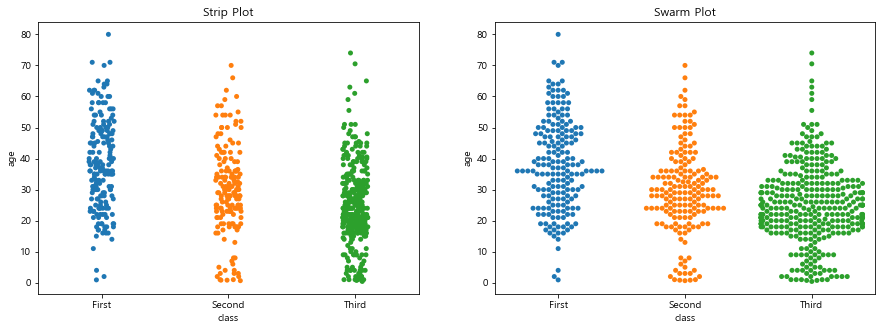

In [20]:
titanic['class'].dtype            # categories 는 범주형 데이터

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 : 데이터 분산을 고려하지 않음
sns.stripplot(x = 'class', y = 'age' , data =titanic, ax = ax1)

# 이산형 변수의 분포 : 데이터 분산을 고려
sns.swarmplot(x = 'class', y = 'age' , data =titanic, ax = ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()